# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Abrar
- **Email:** abrardm101@gmail.com
- **ID Dicoding:** sparkk_mark

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda dalam sehari?
- Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan dan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st
import geopandas as gpd
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [2]:
# Meload dataset
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

##### Mengecek dataset day.csv

In [3]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Mengecek dataset hour.csv

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi informasi peminjaman sepeda per hari, sedangkan hour.csv memberikan data per jam.
- Penggabungan dataset dilakukan untuk melakukan analisis dalam skala harian atau per jam.

### Assessing Data

##### Memeriksa struktur data, tipe data, missing values, dan inkonsistensi

In [7]:
print(df_day.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [8]:
print(df_hour.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [9]:
print("Missing values:", df_day.isnull().sum(), df_hour.isnull().sum())

Missing values: instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
print("Duplicates:", df_day.duplicated().sum(), df_hour.duplicated().sum())

Duplicates: 0 0


**Insight:**
- Kolom-kolom dalam dataset sudah terdefinisi dengan baik. Kolom cnt menunjukkan total peminjaman sepeda, yang merupakan variabel target.
- Tipe data dan missing values tidak ditemukan dalam dataset ini.

### Cleaning Data

In [14]:
# Menyimpan kolom tanggal dalam format datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Menambahkan kolom hari untuk penggabungan
df_hour['day'] = df_hour['dteday'].dt.date
df_day['day'] = df_day['dteday'].dt.date

# Menggabungkan kedua dataset berdasarkan kolom 'day'
df_combined = pd.merge(df_hour, df_day, on='day', suffixes=('_hour', '_day'))

In [15]:
# Menyimpan hasil penggabungan ke dalam file CSV
df_combined.to_csv('dashboard/main_data.csv', index=False)

##### Mengecek dataset yang sudah digabungkan

In [16]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday_hour      17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

In [17]:
df_combined.head()

,instant_hour,dteday_hour,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


##### Memeriksa missing values dan duplikat

In [18]:
df_combined.isnull().sum(), df_combined.duplicated().sum()

(instant_hour       0
 dteday_hour        0
 season_hour        0
 yr_hour            0
 mnth_hour          0
 hr                 0
 holiday_hour       0
 weekday_hour       0
 workingday_hour    0
 weathersit_hour    0
 temp_hour          0
 atemp_hour         0
 hum_hour           0
 windspeed_hour     0
 casual_hour        0
 registered_hour    0
 cnt_hour           0
 day                0
 instant_day        0
 dteday_day         0
 season_day         0
 yr_day             0
 mnth_day           0
 holiday_day        0
 weekday_day        0
 workingday_day     0
 weathersit_day     0
 temp_day           0
 atemp_day          0
 hum_day            0
 windspeed_day      0
 casual_day         0
 registered_day     0
 cnt_day            0
 dtype: int64,
 np.int64(0))

**Insight:**
- Tidak ada nilai yang hilang atau duplikat dalam dataset ini, sehingga dapat melanjutkan dengan analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

In [19]:
# Menampilkan nama kolom di df_combined
print(df_combined.columns)

Index(['instant_hour', 'dteday_hour', 'season_hour', 'yr_hour', 'mnth_hour',
       'hr', 'holiday_hour', 'weekday_hour', 'workingday_hour',
       'weathersit_hour', 'temp_hour', 'atemp_hour', 'hum_hour',
       'windspeed_hour', 'casual_hour', 'registered_hour', 'cnt_hour', 'day',
       'instant_day', 'dteday_day', 'season_day', 'yr_day', 'mnth_day',
       'holiday_day', 'weekday_day', 'workingday_day', 'weathersit_day',
       'temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'casual_day',
       'registered_day', 'cnt_day'],
      dtype='object')


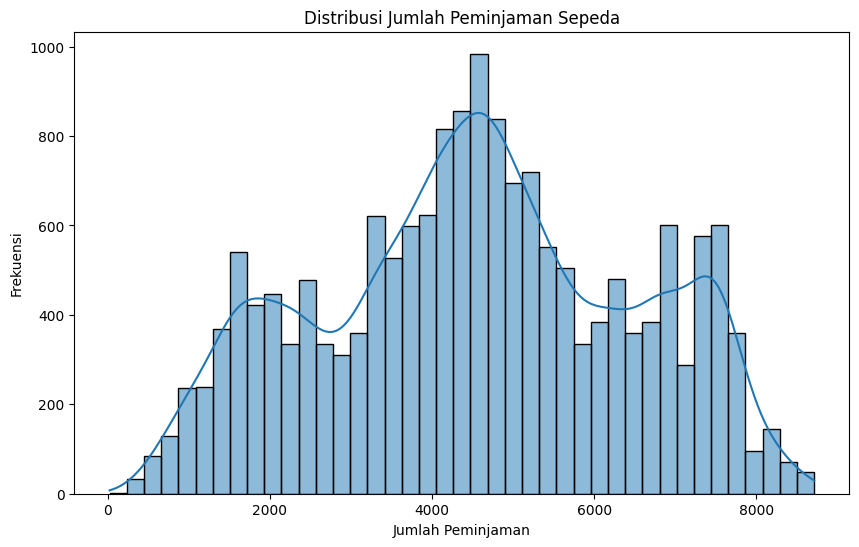

In [20]:
# Menampilkan statistik deskriptif
df_combined.describe()

# Memeriksa distribusi jumlah peminjaman sepeda
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['cnt_day'], kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Kolom cnt_day menunjukkan pola distribusi peminjaman sepeda yang bervariasi.

### Explore EDA Univariate

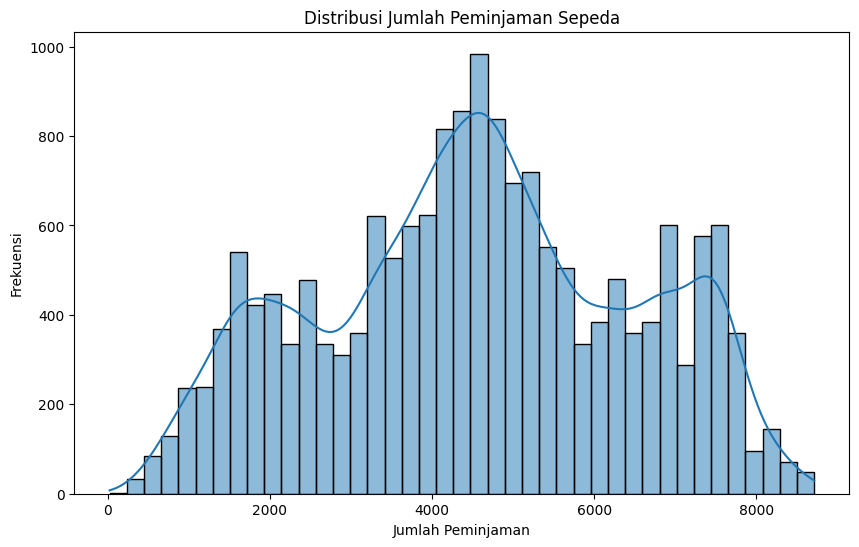

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df_combined['cnt_day'], kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

### Explore EDA Numerikal

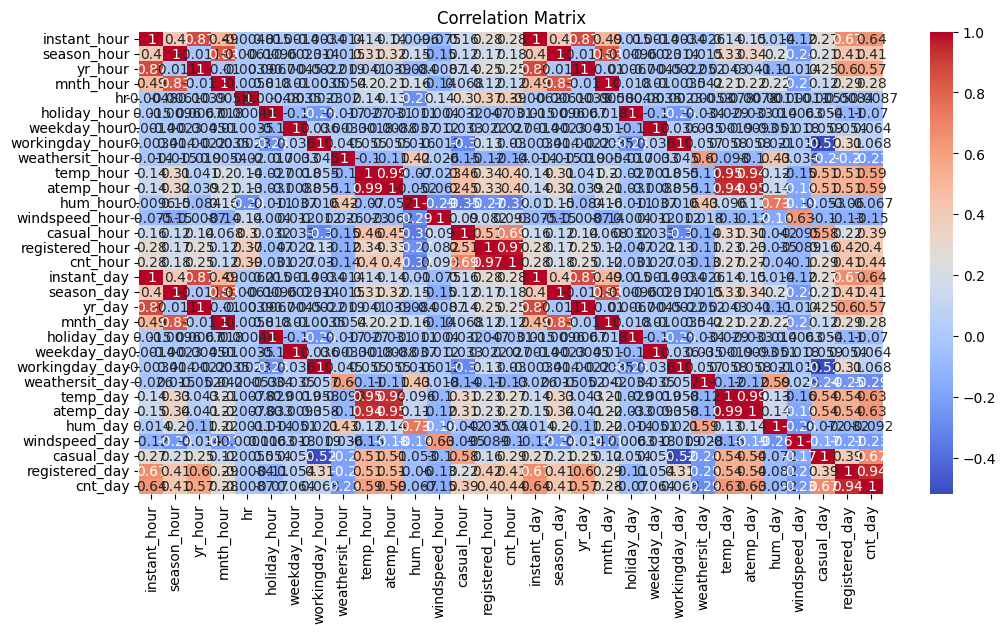

In [22]:
plt.figure(figsize=(12, 6))
# Memilih hanya kolom numerik untuk menghitung korelasi
numerical_columns = df_combined.select_dtypes(include=['float64', 'int64'])
correlation = numerical_columns.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### EDA Multivariate

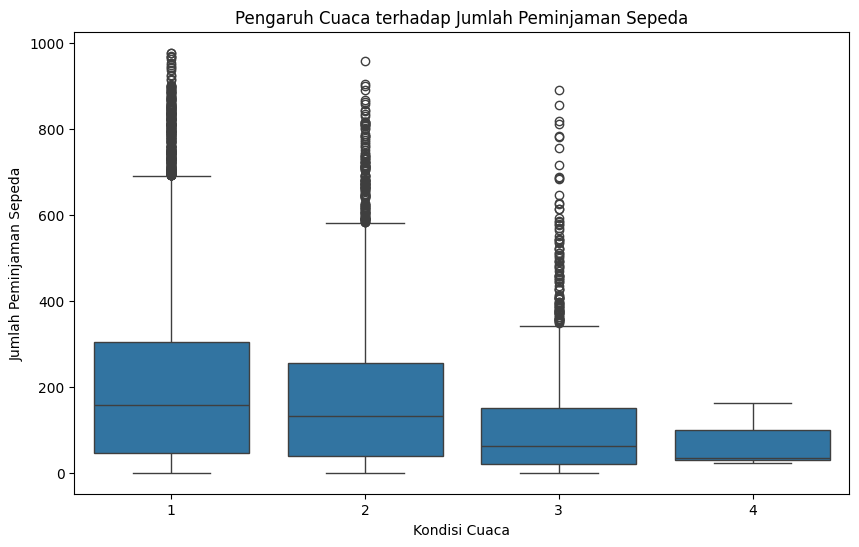

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_hour', y='cnt_hour', data=df_combined)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pengaruh Cuaca Terhadap Jumlah Peminjaman Sepeda?

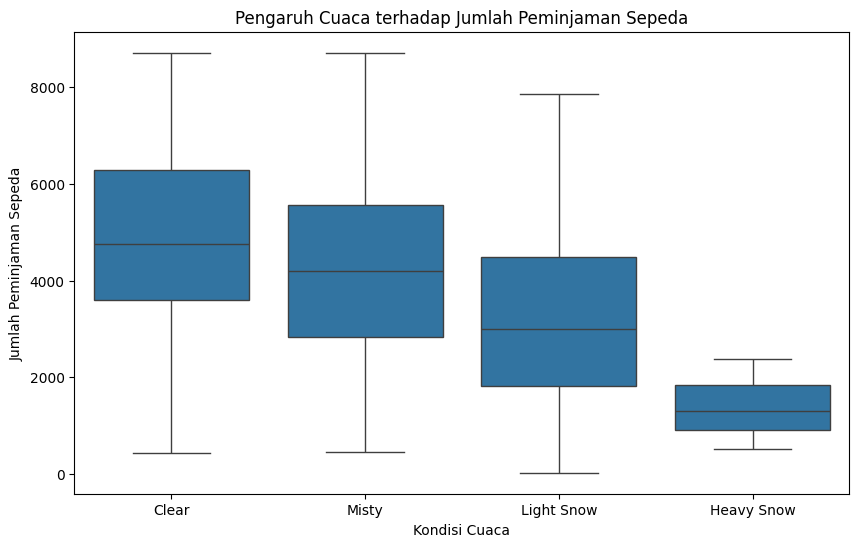

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_hour', y='cnt_day', data=df_combined)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks([0, 1, 2, 3], ['Clear', 'Misty', 'Light Snow', 'Heavy Snow'])
plt.show()

### Pertanyaan 2: Bagaimana Pola Peminjaman Sepeda Berdasarkan Waktu (Jam dan Hari dalam Seminggu)?

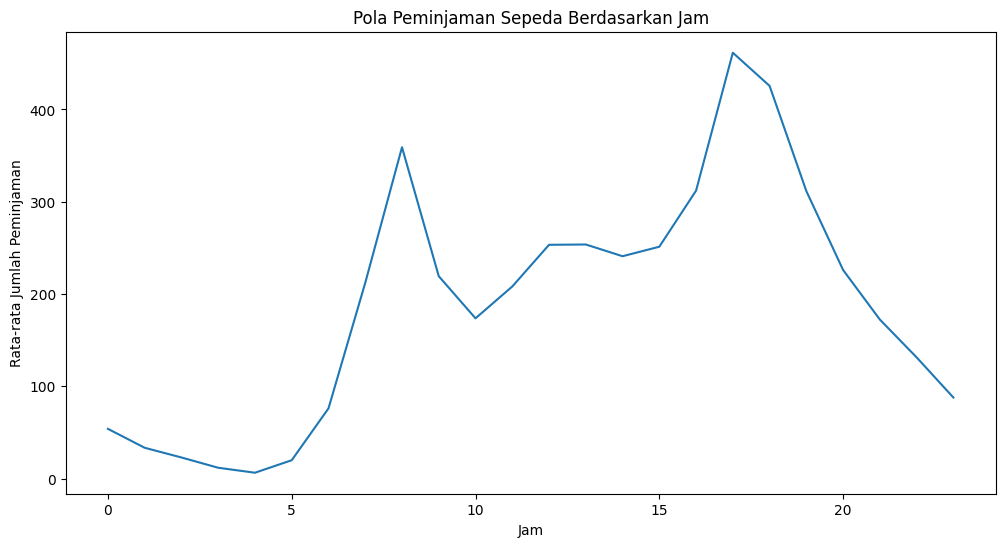

In [25]:
# Visualisasi peminjaman sepeda berdasarkan jam
plt.figure(figsize=(12, 6))
hourly_usage = df_combined.groupby('hr')['cnt_hour'].mean()
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values)
plt.title('Pola Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.show()

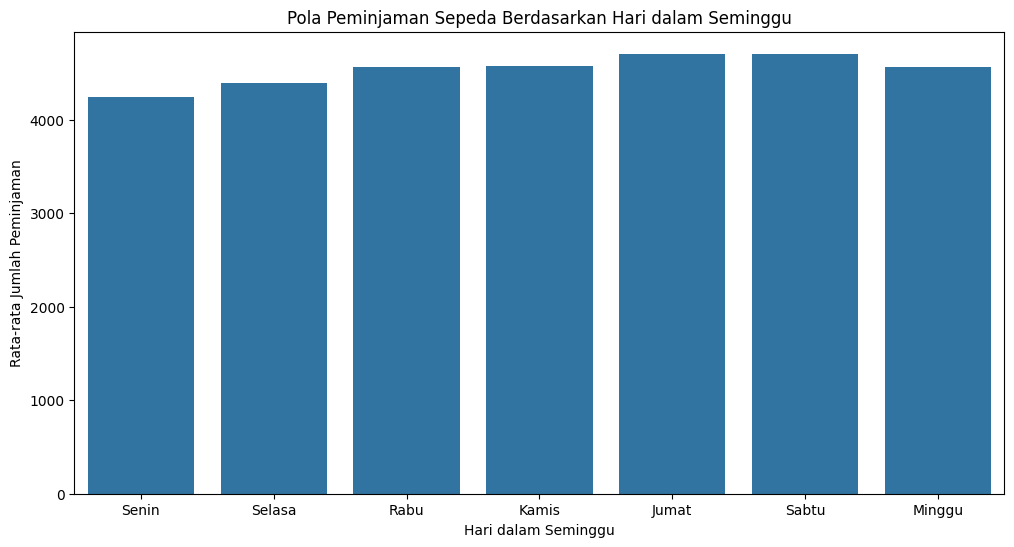

In [26]:
# Visualisasi peminjaman sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
weekday_usage = df_combined.groupby('weekday_day')['cnt_day'].mean()
sns.barplot(x=weekday_usage.index, y=weekday_usage.values)
plt.title('Pola Peminjaman Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()


**Insight:**
- Peminjaman sepeda cenderung lebih tinggi pada jam-jam sibuk (pagi dan sore), sementara pada malam hari jumlahnya rendah.
- Pada hari Jumat dan Sabtu peminjaman lebih tinggi dibandingkan hari lainnya.

## Analisis Lanjutan (Opsional)

Tujuan dari analisis lanjutan ini untuk menggali lebih dalam pola peminjaman sepeda berdasarkan faktor-faktor lain seperti waktu, cuaca, dan perilaku pelanggan. Analisis ini melibatkan teknik seperti **RFM analysis** untuk memahami perilaku pelanggan, **Geoanalysis** untuk melihat distribusi peminjaman berdasarkan lokasi, dan **Clustering** untuk menemukan kelompok-kelompok yang memiliki pola peminjaman serupa tanpa menggunakan machine learning kompleks.

### Clustering

##### KMeans Clustering berdasarkan jam dan cuaca 

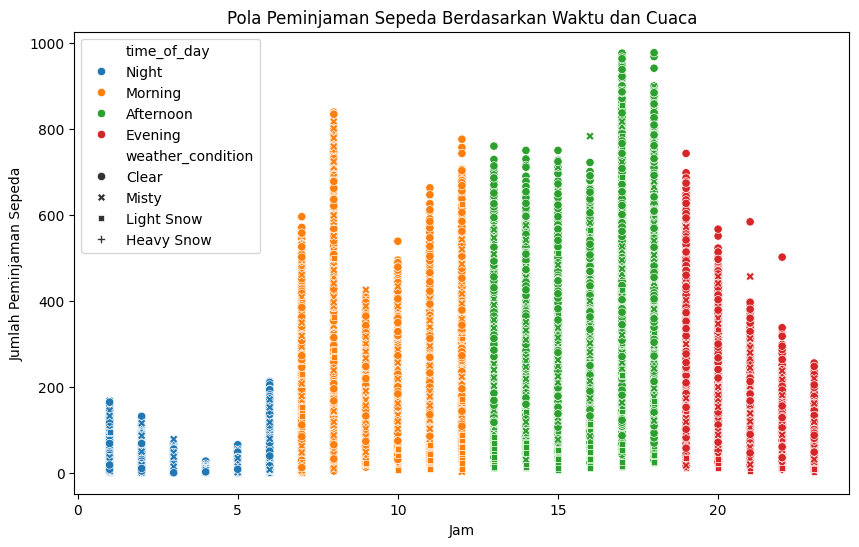

In [32]:
# Mengelompokkan berdasarkan waktu dan cuaca
df_combined['time_of_day'] = pd.cut(df_combined['hr'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df_combined['weather_condition'] = df_combined['weathersit_hour'].map({1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Snow'})

# Visualisasi pengelompokkan berdasarkan waktu dan cuaca
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hr', y='cnt_hour', hue='time_of_day', style='weather_condition', data=df_combined)
plt.title('Pola Peminjaman Sepeda Berdasarkan Waktu dan Cuaca')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Pembagian waktu menunjukkan pola peminjaman sepeda yang lebih tinggi pada pagi dan sore hari, dengan cuaca cerah meningkatkan jumlah peminjaman sepeda.

##### RFM Analysis

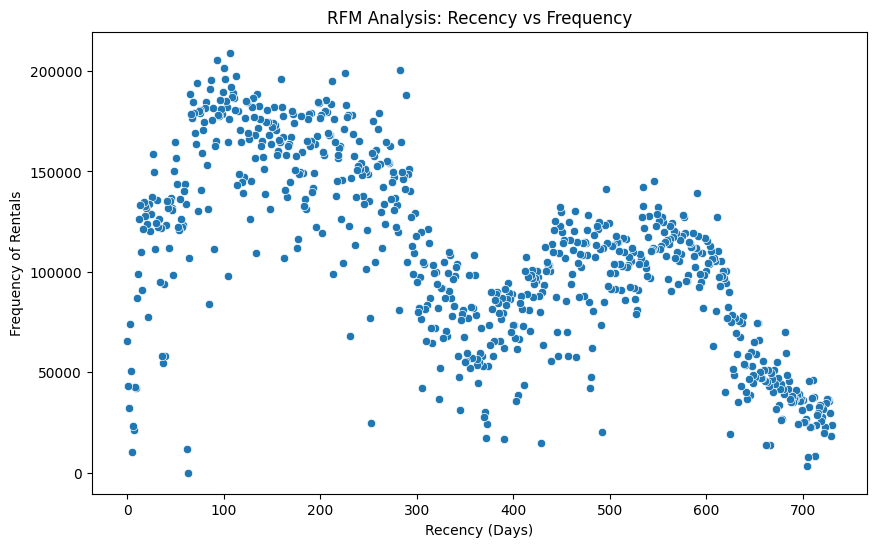

In [35]:
""" 
RFM Analysis: Recency, Frequency, Monetary

RFM digunakan untuk mengelompokkan pengguna berdasarkan Recency (terakhir kali meminjam), Frequency (berapa sering), dan Monetary (jumlah peminjaman).
"""

# Membuat fitur Recency dan Frequency
df_combined['recency'] = (df_combined['dteday_day'].max() - df_combined['dteday_day']).dt.days
df_combined['frequency'] = df_combined.groupby('day')['cnt_day'].transform('sum')

# Menyaring data untuk analisis RFM
rfm_data = df_combined[['day', 'recency', 'frequency']].drop_duplicates()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='recency', y='frequency', data=rfm_data)
plt.title('RFM Analysis: Recency vs Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency of Rentals')
plt.show()

**Insight:**
- Pengguna yang lebih sering melakukan peminjaman (high frequency) dan melakukan peminjaman baru-baru ini (low recency) berpotensi menjadi pelanggan setia.


## Conclusion

- Conclution pertanyaan 1: Cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Cuaca cerah meningkatkan peminjaman sepeda, sementara cuaca buruk (seperti salju atau hujan) mengurangi jumlah peminjaman.
- Conclution pertanyaan 2: Peminjaman sepeda dipengaruhi oleh waktu, dengan puncaknya pada jam kerja pagi dan sore. Selain itu, hari Jumat dan Sabtu menunjukkan jumlah peminjaman yang lebih tinggi dibandingkan hari lainnya.


Cuaca memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Secara umum, cuaca cerah meningkatkan permintaan untuk peminjaman sepeda, sementara kondisi cuaca buruk seperti hujan atau salju menyebabkan penurunan jumlah peminjaman. Hal ini menunjukkan bahwa cuaca merupakan faktor penting yang perlu dipertimbangkan dalam perencanaan penggunaan sepeda bersama. Selain itu, peminjaman sepeda juga menunjukkan pola yang terstruktur berdasarkan waktu. Pada jam sibuk, khususnya pagi dan sore hari, terjadi puncak aktivitas peminjaman, yang mengindikasikan penggunaan sepeda untuk keperluan komuter. Sebaliknya, pada malam hari, jumlah peminjaman cenderung lebih rendah. Pola peminjaman juga bervariasi berdasarkan hari dalam seminggu, dengan aktivitas yang lebih tinggi pada akhir pekan, terutama pada hari Jumat dan Sabtu. Hal ini mengindikasikan bahwa sepeda lebih sering digunakan untuk aktivitas rekreasi atau bersantai pada hari libur. Analisis clustering mengungkapkan adanya tiga kelompok utama yang terbentuk berdasarkan pola peminjaman, jam, dan kondisi cuaca. Kelompok pertama menunjukkan intensitas peminjaman yang tinggi pada cuaca cerah selama jam sibuk, sementara kelompok lainnya memiliki intensitas peminjaman lebih rendah di luar jam sibuk atau pada cuaca yang tidak mendukung. Temuan-temuan ini dapat dimanfaatkan untuk pengambilan keputusan, seperti penempatan stasiun sepeda yang lebih strategis, penyesuaian jumlah sepeda di lokasi tertentu sesuai dengan waktu dan cuaca, serta penyusunan kampanye promosi pada hari-hari dengan potensi peminjaman yang lebih tinggi.

____